<a href="https://colab.research.google.com/github/msbeigi/Data_experiment/blob/main/Copy_of_House_prices_advanced_regression_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas.core.dtypes.missing import isna
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
import xgboost as xgb

from pandas.core.series import Series


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/ML/Hand-on/House pricing - kaggle/train.csv')#('/content/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/ML/Hand-on/House pricing - kaggle/test.csv')#('/content/test.csv')

In [ ]:
def data_prepration(df,istrain=True):
  # fill zero

  df['MasVnrType'].fillna('None',inplace=True)
  df['PoolQC'].fillna('NA',inplace=True)
  df['Alley'].fillna( 'NA',inplace=True)
  df['BsmtQual'].fillna( 'NA',inplace=True)
  df['BsmtCond'].fillna( 'NA',inplace=True)
  df['BsmtExposure'].fillna( 'NA',inplace=True)
  df['BsmtFinType1'].fillna( 'NA',inplace=True)
  df['BsmtFinType2'].fillna( 'NA',inplace=True)
  df['FireplaceQu'].fillna( 'NA',inplace=True)
  df['GarageFinish'].fillna( 'NA',inplace=True)
  df['GarageQual'].fillna( 'NA',inplace=True)
  df['GarageType'].fillna( 'NA',inplace=True)
  df['Fence'].fillna('NA',inplace=True)
  df['MiscFeature'].fillna( 'NA',inplace=True)

  # value set

  df['GarageYrBlt'].fillna(df['YearBuilt'],inplace=True)
  df['GarageCond'].fillna(df['GarageQual'],inplace=True)


  # drop column
  if istrain:
    df.drop(df[ df['LotFrontage'].isna()].index,inplace=True)
    df.drop(df[ df['MasVnrArea'].isna()].index,inplace=True)
    df.drop(df[ df['Electrical'].isna()].index,inplace=True)
    df['MSZoning'].dropna(axis=0,inplace=True)
  

  return df

def get_categorical_cols(df):
  all_cols=df.columns
  num_cols=df._get_numeric_data().columns
  cat_cols=list(set(all_cols)-set(num_cols))
  return (cat_cols)
  
def onehot(df,cat_list):
  df=pd.get_dummies(df,columns=cat_list)
  return df

def preprocess(df, cat_list,num_list, normalized=True):  
  if normalized:
    for col in num_list:
        scaler = StandardScaler()
        col_normalized = np.array(df[col]).reshape((-1,1))
        df[col] = scaler.fit_transform(col_normalized)


  return df

def encode_dataframe(df):
  cat_list=get_categorical_cols(df)
  le=LabelEncoder()
  for i in cat_list:
    le.fit(df[i])
    df[i]=le.fit_transform(df[i])
  return df
  
def get_correl(df,rel):
  t_pearson=df.corr()
  ax = sns.heatmap(t_pearson,vmin=-1, vmax=1, center=0,
              cmap=sns.diverging_palette(20, 220, n=200), square=True)
  sns.set(rc = {'figure.figsize':(14,10)})
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
  # print(t_pearson)
  correl=dict(t_pearson['SalePrice'])
  correl_list=[]
  for i in correl:
    if(np.abs(correl[i])>rel and i!='SalePrice'):
      correl_list.append(i)
  return correl_list


In [ ]:
cat_list_all=get_categorical_cols(X_train)
num_list_all=list(X_train._get_numeric_data().columns)

In [ ]:
df_train_=data_prepration(df_train)
df_test_=data_prepration(df_test,istrain=False)
df_all=onehot(pd.concat([df_train_.iloc[:,:-1],df_test_],axis=0),cat_list_all)

In [ ]:
y_train=df_train_.iloc[:,-1]
X_train=df_all[df_all.Id<=1460]
df_test_encoded=df_all[df_all.Id>1460]

In [ ]:
dt=df_train_.copy()
df_encoded=encode_dataframe(dt)


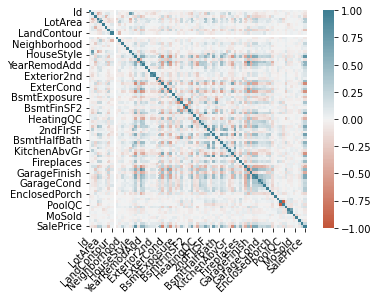

In [ ]:

correl_list=get_correl(df_encoded,0.4)

In [ ]:
cat_list=get_categorical_cols(X_train[correl_list])
num_list=list(X_train[correl_list]._get_numeric_data().columns)

In [ ]:
d_=onehot(df_train_[correl_list],cat_list)
t=preprocess(d_, cat_list,num_list)
t_=pd.concat([t,y_train],axis=1)


In [ ]:
y=t_.pop('SalePrice')
X=t_


In [ ]:
# train test
X_train_normal,X_test_normal,y_train_normal,y_test_normal=train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

X_selected=X
y_selected=y
X_train_selected,X_test_selected,y_train_selected,y_test_selected=train_test_split(X_selected, y_selected, test_size=0.3, random_state=42)


In [ ]:
# t=preprocess(X_train, cat_list_all,num_list_all,normalized=True)
# t_1=pd.concat([t,y_train],axis=1)
# y_=t_1.pop('SalePrice')
# X_=t_1.drop('Id',axis=1)
X_=X_train.iloc[:,1:]
y_=y_train
# train test
X_train_all,X_test_all,y_train_all,y_test_all=train_test_split(X_, y_, test_size=0.3, random_state=42)

In [ ]:
# Define model selected featurs
ndim = X_train_selected.shape[1]
model = Sequential()
model.add(Dense(500, input_dim=ndim, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(50, activation= 'relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train_selected.values, y_train_selected, epochs=20,verbose=False)

In [ ]:
# Define model all featurs
ndim = X_train_all.shape[1]
model_all = Sequential()
model_all.add(Dense(295, input_dim=ndim, activation= 'relu'))
model_all.add(Dense(210, activation= 'relu'))
model_all.add(Dense(150, activation= 'relu'))
model_all.add(Dense(100, activation= 'relu'))
model_all.add(Dense(70, activation= 'relu'))
model_all.add(Dense(50, activation= 'relu'))
model_all.add(Dense(15, activation= 'relu'))
model_all.add(Dense(1))

In [ ]:
model_all.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model_all.fit(X_train_all, y_train_all, epochs=5,verbose=False,batch_size=15)

In [ ]:
# all features normalized

pred_train= model_all.predict(X_train_all)
print(np.sqrt(mean_squared_error(y_train_all,pred_train))/1000)
pred= model_all.predict(X_test_all)
print(np.sqrt(mean_squared_error(y_test_all,pred))/1000)

# before : 29.34100789687578      46.2554274345088
# 22.811279232242278     45.711891703869135
# 26.884594949450612     47.716680132794735

41.74839167568348
69.82712018492028


In [ ]:
# selected features normalized
pred_train_selected= model.predict(X_train_selected)
print(np.sqrt(mean_squared_error(y_train_selected,pred_train_selected))/1000)
pred_selected= model.predict(X_test_selected)
print(np.sqrt(mean_squared_error(y_test_selected,pred_selected))/1000)

31.896206074272037
52.2589971817183


In [ ]:
### Keras Regressor

In [ ]:
def baseline_model():
	# create model
  n=X_.shape[1]
  mdl = Sequential()
  mdl.add(Dense(100, input_dim=n, kernel_initializer='normal', activation='relu'))
  mdl.add(Dense(50, kernel_initializer='normal'))
  mdl.add(Dense(1, kernel_initializer='normal'))
	# Compile model
  mdl.compile(loss='mean_squared_error', optimizer='adam')
  return mdl

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=20, batch_size=15, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X_, y_, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app


Standardized: -3938488294.40 (1425192873.41) MSE


In [ ]:
# Gausian regressor

In [ ]:
gpr=GaussianProcessRegressor(kernel=(RBF()+DotProduct() ),alpha=0.1)
gpr.fit(X_train_selected,y_train_selected)
pred_gpr=gpr.predict(X_test_selected)
# selected features normalized
pred_gpr_train_selected= gpr.predict(X_train_selected)
print(np.sqrt(mean_squared_error(y_train_selected,pred_gpr_train_selected))/1000)
print(np.sqrt(mean_squared_error(y_test_selected,pred_gpr))/1000)

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


2.8010782495711495
47.27958914358158


In [ ]:
gpr_all=GaussianProcessRegressor(kernel=(RBF()+DotProduct() ),alpha=0.1)
gpr_all.fit(X_train_all,y_train_all)
pred_gpr_all=gpr_all.predict(X_test_all)
# all features normalized
pred_gpr_train_all= gpr_all.predict(X_train_all)
print(np.sqrt(mean_squared_error(y_train_all,pred_gpr_train_all))/1000)
print(np.sqrt(mean_squared_error(y_test_all,pred_gpr_all))/1000)

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


1.8036160523963785
44.70605006240005


In [ ]:
#### ExtraTree regressor

In [ ]:
etr=ExtraTreesRegressor(n_estimators=300,verbose=False,random_state=42)
etr.fit(X_train_all,y_train_all)
pred_etr_all=etr.predict(X_test_all)
# all features normalized
pred_etr_train_all= etr.predict(X_train_all)
print(np.sqrt(mean_squared_error(y_train_all,pred_etr_train_all))/1000)
print(np.sqrt(mean_squared_error(y_test_all,pred_etr_all))/1000)

0.0
36.578362945853435


In [ ]:
etr.fit(X_train_selected,y_train_selected)
pred_etr_selected=etr.predict(X_test_selected)
# selected features normalized
pred_etr_train_selected= etr.predict(X_train_selected)
print(np.sqrt(mean_squared_error(y_train_selected,pred_etr_train_selected))/1000)
print(np.sqrt(mean_squared_error(y_test_selected,pred_etr_selected))/1000)

0.5803674244006026
33.930979719353466


In [ ]:
#### XGB

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train_all,y_train_all)
pred_xgbr_all=xgbr.predict(X_test_all)
# all features normalized
pred_xgbr_train_all= xgbr.predict(X_train_all)
print(np.sqrt(mean_squared_error(y_train_all,pred_xgbr_train_all))/1000)
print(np.sqrt(mean_squared_error(y_test_all,pred_xgbr_all))/1000)

12.194266907331853
30.269906492426884


In [ ]:
#### xgbr selected

In [ ]:
xgbr.fit(X_train_selected,y_train_selected)
pred_xgbr_selected=xgbr.predict(X_test_selected)
# selected features normalized
pred_xgbr_train_selected= xgbr.predict(X_train_selected)
print(np.sqrt(mean_squared_error(y_train_selected,pred_xgbr_train_selected))/1000)
print(np.sqrt(mean_squared_error(y_test_selected,pred_xgbr_selected))/1000)

14.59640562718175
31.56448388538525


In [ ]:
#### *****************output*************8

In [ ]:
df_data_unsupervised=preprocess(df_test_encoded, cat_list_all,num_list_all)
data_test_normalized=df_data_unsupervised.iloc[:,1:]

In [ ]:
pred_xgbr_output=xgbr.predict(data_test_normalized)
output=Series(pred_xgbr_output)
df_output=pd.DataFrame(output,columns=['SalePrice'])
df_total=pd.concat([df_test,df_output],axis=1)[['Id','SalePrice']]
df_total.to_csv('output.csv')

In [ ]:
#### LGBM

In [ ]:
lgbm=LGBMRegressor(n_estimators=300)
lgbm.fit(X_train_all,y_train_all)
pred_lgbm_all=lgbm.predict(X_test_all)
# all features normalized
pred_lgbm_train_all= lgbm.predict(X_train_all)
print(np.sqrt(mean_squared_error(y_train_all,pred_lgbm_train_all))/1000)
print(np.sqrt(mean_squared_error(y_test_all,pred_lgbm_all))/1000)

5.853453587802839
34.980993610335595


In [ ]:
lgbm.fit(X_train_selected,y_train_selected)
pred_lgbm_selected=lgbm.predict(X_test_selected)
# selected features normalized
pred_lgbm_train_selected= lgbm.predict(X_train_selected)
print(np.sqrt(mean_squared_error(y_train_selected,pred_lgbm_train_selected))/1000)
print(np.sqrt(mean_squared_error(y_test_selected,pred_lgbm_selected))/1000)

7.8111656895728805
38.38382471084794
